In [50]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [51]:
TRAIN_DIR = '../datasets/CIFAR-10-images/train/'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


In [52]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [00:00<00:00, 6705.88it/s]

50000


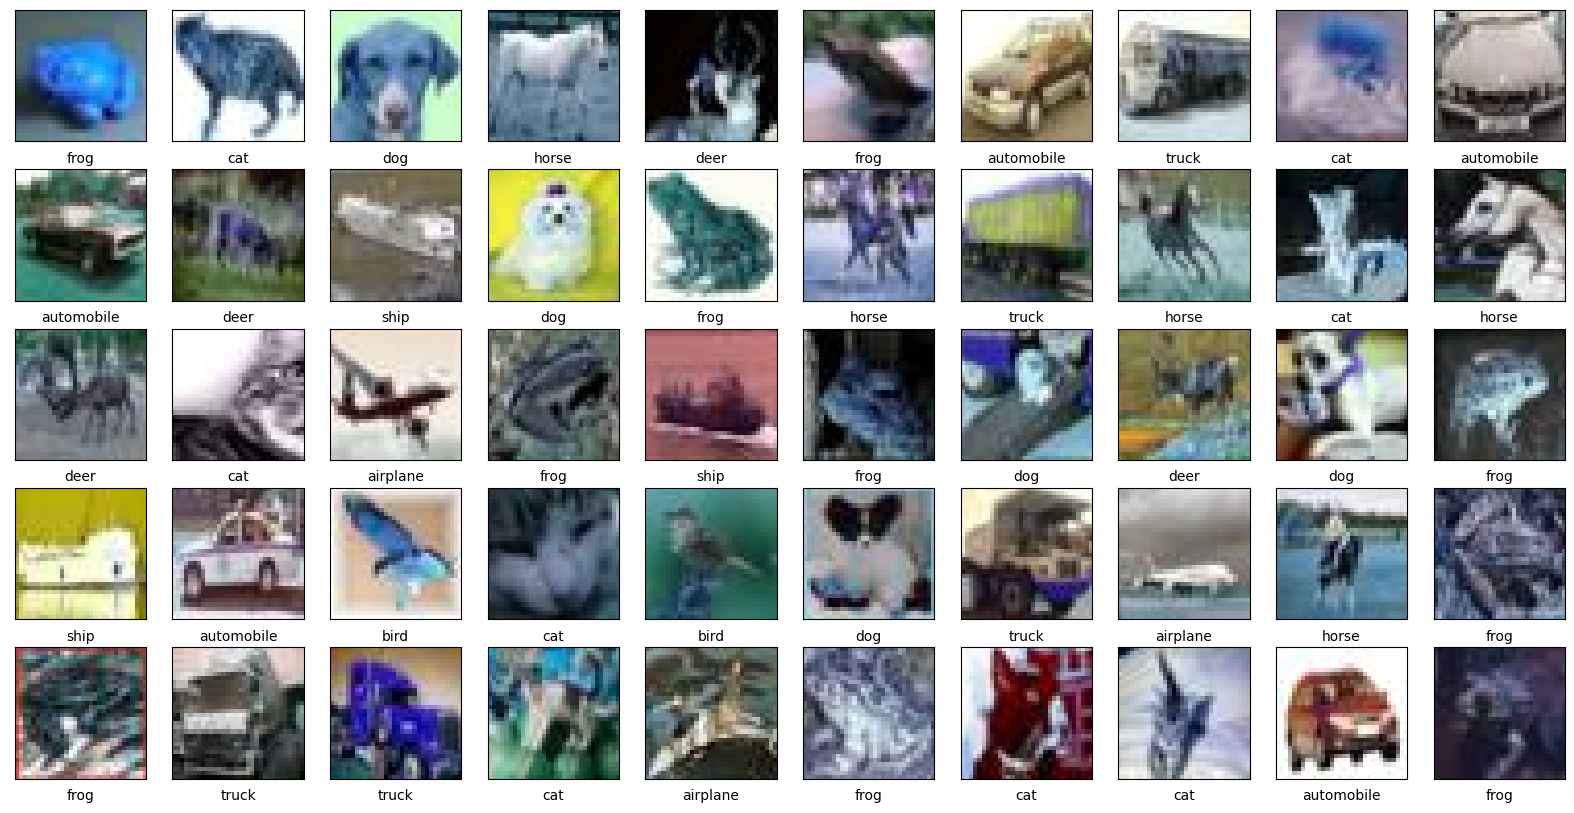

In [53]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [54]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [55]:
import math
def calculate_euclidean_distance(x1, x2):
    if type(x1) == int:
        print("x1 is int")
        return
    return np.sqrt(np.sum((x1-x2)**2))

569.7244948218394 8
572.9310604252487 7
555.4457669295896 0
580.0560317762414 1
562.9831258572498 9
555.323329241623 4
568.7336810845653 7
575.7777348942906 1
567.5323779309864 6
543.9852939188705 0
588.9490640114814 3
567.6054968021364 2
572.7093503689284 6
564.9176931199801 3
569.4330513765424 9
570.0605231025912 1
573.9442481635302 1
567.6063776949657 3
569.7946998700497 1
567.8336023871782 1
564.5918880040697 3
577.9801034637784 5
561.4338785645199 5
568.0677776462946 5
565.0672526345869 2
569.5463106719242 2
559.1234210798185 8
575.7516825854701 1
566.8985799946936 7
575.7786032842832 7
584.377446518943 8
570.5409713596387 7
563.2344094602175 0
576.9835352936858 1
542.4711973920828 9
574.2377556378542 4
559.9276739008352 7
573.8806496127919 1
579.8620525607794 6
565.2441950166317 0
567.5314969232985 3
568.4953825670003 2
574.6277055624798 6
558.5615454003256 3
579.2849039980241 9
576.2204439274955 1
571.2521334752282 1
562.2561693747789 3
570.8738915031936 1
569.1221310052879 1
55

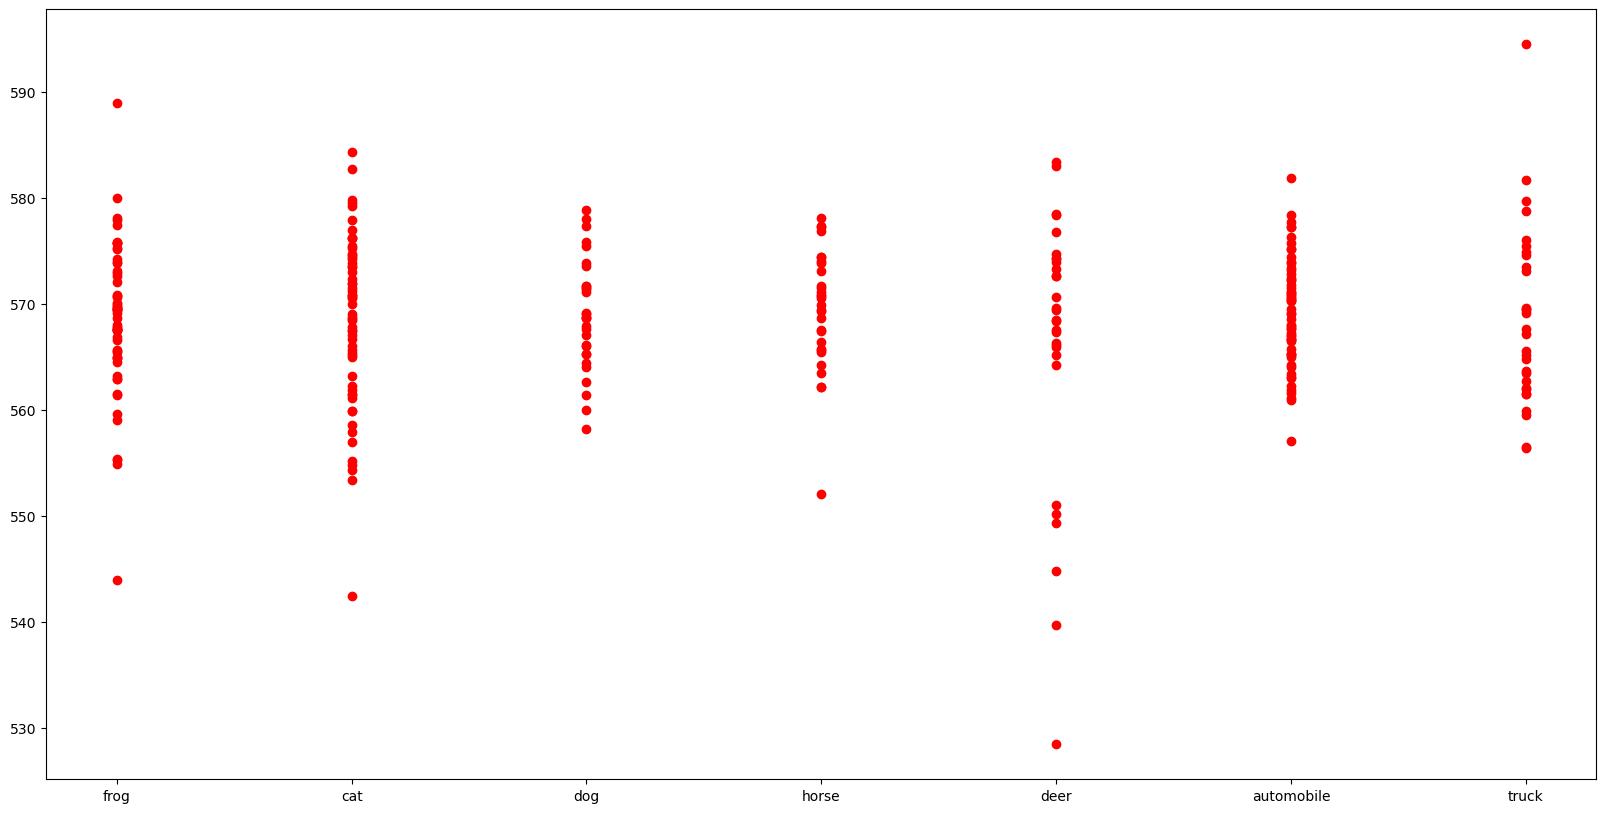

In [56]:

plt.figure(figsize=(20,10))

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0

        train = train[:30]
        validation = validation[:10]

        scores = []
        for v in validation:
            for t in train:
                l2_dist = calculate_euclidean_distance(v[0], t[0])
                scores.append([l2_dist, t[1]])
                print(l2_dist, t[1])
                plt.plot(CATEGORIES[v[1]], l2_dist, 'ro')

            
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f1+f0+f3+f4
        validation = f2
    elif i==3:
        train = f1+f2+f0+f4
        validation = f3
    elif i==4:
        train = f1+f2+f3+f0
        validation = f4
    print(len(train), len(validation))
plt.show()